In [1]:
#Student Name: Tsai-Chun, Lin/ Student Number: 46207704

In [2]:
#Use this cell to import all the required libraries.
import pandas as pd
import pandas as pd 
import numpy as np

#Fix any issues related to punctuation and spacing
import re

#Tokenising
import nltk
from nltk.tokenize import word_tokenize

#Stopwords Removal
from nltk.corpus import stopwords

#Lemmatization
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

#Stemming
from nltk.stem import SnowballStemmer

#N-gram
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#SVD
from sklearn.decomposition import TruncatedSVD

# Build LDA model
import gensim.corpora as corpora
from gensim import models

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel

#WordCloud
from wordcloud import WordCloud

#LDA
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import os

#Word Frequency Bar Plot
import matplotlib.pyplot as plt
from collections import Counter

#Label Encoder
from sklearn import preprocessing

#Cross validation
from sklearn.model_selection import cross_val_score

#SVM
from sklearn.svm import SVC

#F1 score
from sklearn.metrics import f1_score

[nltk_data] Downloading package omw-1.4 to /Users/brooke/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
#your work should only start with the following code
df=pd.read_csv("A2_Data.csv")

# Text preparation

I first cleaned and filtered the data, dropping null values and selecting key attributes. After that, I used regular expressions to get rid of punctuation, which reduced noise in the text. In addition, I set up a function to correct punctuation and spacing errors in sentences. Using NLTK's word_tokenize function, tokenization was performed, followed by case folding to ensure consistency. In order to eradicate less informative words, stopwords, including customised terms, have been deleted. To further improve data quality, lemmatization and stemming were used to reduce terms to their base forms. The enriched data was then organised into a new column for processed clinician notes.

In [4]:
#remove null value
df1 = df.dropna()

#including only necessary attribute
df2 = df1[["Patient_ID", "Clinician_Note", "AHRQ Elixhauser score", "Van Walraven Elixhauser score", "Discharge_Decision"]]

#removing punctuations to reduce noise
df2["Clinician_Note"].replace({r'[^\w\s]+': ''}, regex=True, inplace =True)

#takes a sentence as input and aims to fix any issues related to punctuation and spacing
def fix_sentence(sentence):
    tokens = re.split(r"(?<!\w)___(?!\w)|(?<=\w)\b,?\s*\b(?=\w)", sentence)
    tokens = [token for token in tokens if token]
    fixed_sentence = " ".join(tokens)
    return fixed_sentence
df2['Clinician_Note'] = df2['Clinician_Note'].apply(lambda x: fix_sentence(x))

#Tokenising
nltk.download('punkt')
df3 = df2['Clinician_Note'].apply(word_tokenize)

#Case Folding
df4 = df3.apply(lambda x: [word.lower() for word in x])

#Stopwords Removal
nltk.download("stopwords")
My_stop_words = stopwords.words("English")
My_stop_words.extend(['patient', 'discharge', 'given','X', 'yes', 'admission'])
df5 = df4.apply(lambda x: [word for word in x if word not in My_stop_words])

#Lemmatization
nltk.download('omw-1.4')
My_lemmatizer = WordNetLemmatizer()
df6 = df5.apply(lambda x:[My_lemmatizer.lemmatize(word) for word in x])

#Stemming
My_stemmer = SnowballStemmer("english")
df6 = df5.apply(lambda x:[My_stemmer.stem(word) for word in x])

#Enriching Data
df7 = df6.apply(lambda x:" ".join(x))
df_enriched=df2
df_enriched["Processed_Clinician_Note"]=df7

/var/folders/s5/2drln73x6mvclg1rpm133q100000gn/T/ipykernel_57453/2538825379.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Clinician_Note"].replace({r'[^\w\s]+': ''}, regex=True, inplace =True)
/var/folders/s5/2drln73x6mvclg1rpm133q100000gn/T/ipykernel_57453/2538825379.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Clinician_Note'] = df2['Clinician_Note'].apply(lambda x: fix_sentence(x))
[nltk_data] Downloading package punkt to /Users/brooke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwo

# Text feature generation

I first utilised n-gram generation to extract contextual information and identify frequent word pairs. The results indicate that "continue home" is the most frequent n-gram at 27.8%, followed by "transit issue" at 25.0%. In addition, I employed sentiment analysis to assign sentiment scores to the processed clinician notes, thereby gaining a deeper comprehension of the conveyed emotional tone. And the result of the sentiment score, 0.9719, indicates that the processed clinician's note contains predominantly positive language and expresses an overall positive sentiment. Singular Value Decomposition (SVD) was then used to reduce the dimensionality of the TF-IDF matrix, which enabled the extraction of latent semantic features. By adding these features to the enriched DataFrame, the dataset is made better with representations of the text that are both compact and useful. 

##### Feature 1 generation: N-gram

[nltk_data] Downloading package punkt to /Users/brooke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


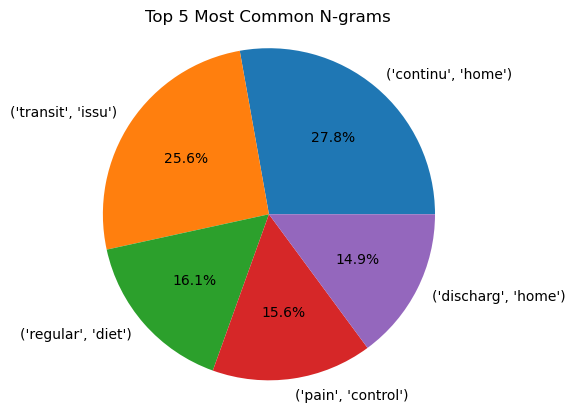

In [5]:
nltk.download('punkt')

# Define the value of n for the n-gram analysis
n = 2  # Change the value of n to set the desired n-gram size

# Create a list to store the n-grams
ngram_list = []

# Iterate over each tokenized sentence in df3 and generate n-grams
for sentence in df6:
    sentence_ngrams = list(ngrams(sentence, n))
    ngram_list.extend(sentence_ngrams)

# Compute the frequency distribution of the n-grams
ngram_freqdist = FreqDist(ngram_list)

# Get the top 10 most common n-grams
top_ngrams = ngram_freqdist.most_common(5)

# Extract the n-grams and their frequencies
ngrams, frequencies = zip(*top_ngrams)

# Plot the top 5 n-grams as a pie chart
plt.pie(frequencies, labels=ngrams, autopct='%1.1f%%')
plt.title('Top 5 Most Common N-grams')
plt.axis('equal')
plt.show()

##### Feature 2 generation: TF-IDF

In [6]:
My_vectorizer = TfidfVectorizer ()
TFIDF=My_vectorizer.fit_transform(df_enriched["Processed_Clinician_Note"])
TFIDF

<42585x88387 sparse matrix of type '<class 'numpy.float64'>'
	with 6494740 stored elements in Compressed Sparse Row format>

##### Feature 3 generation: Sentiment

In [7]:
My_sentiment_analyser = SentimentIntensityAnalyzer()

sentimental_text_list = []

for sentence in df_enriched["Processed_Clinician_Note"]:
    My_sentiment_score = My_sentiment_analyser.polarity_scores(sentence)['compound']
    sentimental_text_list.append(My_sentiment_score)

df_enriched["Sentiment"] = sentimental_text_list

df_intergated = pd.concat([df1, df_enriched], axis=1)

print(My_sentiment_score)

0.9719


/var/folders/s5/2drln73x6mvclg1rpm133q100000gn/T/ipykernel_57453/397159383.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriched["Sentiment"] = sentimental_text_list


##### Feature 4 generation: SVD

In [8]:
My_SVD = TruncatedSVD(n_components=3, n_iter=100)

SVD_Note= My_SVD.fit_transform(TFIDF)

df_enriched[['SVD1','SVD2','SVD3']]=SVD_Note

/var/folders/s5/2drln73x6mvclg1rpm133q100000gn/T/ipykernel_57453/2968748442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriched[['SVD1','SVD2','SVD3']]=SVD_Note
/var/folders/s5/2drln73x6mvclg1rpm133q100000gn/T/ipykernel_57453/2968748442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriched[['SVD1','SVD2','SVD3']]=SVD_Note
/var/folders/s5/2drln73x6mvclg1rpm133q100000gn/T/ipykernel_57453/2968748442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

# Topic modeling & profiling

The use of Latent Dirichlet Allocation (LDA) in the process of topic modelling entails the identification of patterns and themes within a provided dataset. The dataset denoted by the variable df6 is utilised for the purpose of topic modelling in this instance. Construct an LDA model with a topic count of three, then proceed to extract and output the resultant topics alongside their corresponding keywords.

The thematic domain of Topic 0 is distinguished by the presence of specific terms such as "pain", "home", "medical", and "stable". The subject matter at hand suggests that the accompanying documentation may pertain to the management of familial pain. The aforementioned keywords indicate potential discourse pertaining to pain management, pharmaceutical intervention, and symptom stabilisation within a domestic setting.

Topic 1 pertains to the interrelatedness of pain and family and encompasses keywords such as 'continuity', 'issues', and 'tolerance'. The occurrence of these lexical items suggests that the subject matter pertains to persistent pain concerns, domestic difficulties, and the endurance of symptoms.

Topic 2 exhibits resemblances to the preceding topics, with a focus on the concepts of continuity, family, and pain management. The text contained relevant terms such as 'improv' and 'like', indicating a potential emphasis on enhancing and personalising home-based pain management strategies.

##### Topic modeling

In [9]:
# Create Dictionary and store it to a list 
My_id2word = corpora.Dictionary(df6)

# Store BoW to a list
My_Corpus = [My_id2word.doc2bow(text) for text in df6]

# Build LDA model
from gensim import models

number_of_topics = 3 #Set number of topics
My_LDA = models.LdaMulticore(corpus=My_Corpus, id2word=My_id2word, num_topics=number_of_topics)

#Print topics and keywords
My_LDA.print_topics()

[(0,
  '0.008*"continu" + 0.007*"home" + 0.007*"pain" + 0.006*"medic" + 0.006*"day" + 0.005*"follow" + 0.005*"start" + 0.005*"well" + 0.005*"present" + 0.004*"hospit"'),
 (1,
  '0.008*"continu" + 0.007*"home" + 0.006*"pain" + 0.006*"follow" + 0.006*"outpati" + 0.005*"day" + 0.005*"medic" + 0.005*"present" + 0.005*"hospit" + 0.004*"mg"'),
 (2,
  '0.010*"pain" + 0.009*"home" + 0.008*"continu" + 0.006*"stabl" + 0.005*"medic" + 0.005*"start" + 0.005*"well" + 0.005*"day" + 0.005*"follow" + 0.005*"present"')]

In [10]:
# Compute Coherence Score
cm = CoherenceModel(model=My_LDA, corpus=My_Corpus, coherence='u_mass')
coherence = cm.get_coherence()  

print (coherence)  # get coherence value

-0.6752226611919916


##### Topic vectors

In [11]:
#Generate probability for each topic (for each document this will generate a probability for each topic number)
topic_probabilities = My_LDA.get_document_topics(bow=My_Corpus)

overall_topic_vectors = []
for element in topic_probabilities:
    
    document_topic_vector = [0] *number_of_topics ## Fill empty list with 0's to equal number of topics
    for TOUPLE in element:
        
        ## From the topic vector, update a 0 value if the touple topic number (index) exists with probability
        document_topic_vector[TOUPLE[0]] = TOUPLE[1] 
        
    overall_topic_vectors.append(document_topic_vector)

##### Topic numbers

In [12]:
#Topic number
df8 = df2
df8["Tokens"]=df6

df8["Processed_Clinician_Note"]=df7

df8[["Topic0", "Topic1", "Topic2"]]= overall_topic_vectors

most_probable_topic_list = []
probability_minimum = 0.5

for i in overall_topic_vectors:
    
    current_best_probs = [] 
    
    for j in i:
           
        if j >= probability_minimum:
                current_best_probs.append(j)
            
    if len(current_best_probs) > 0: 
        
            most_probable_topic_list.append(i.index(max(current_best_probs)))
    
    else:
            most_probable_topic_list.append(-1)
            
df8["Topic_No"]=most_probable_topic_list

/var/folders/s5/2drln73x6mvclg1rpm133q100000gn/T/ipykernel_57453/1928867089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8["Tokens"]=df6
/var/folders/s5/2drln73x6mvclg1rpm133q100000gn/T/ipykernel_57453/1928867089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8["Processed_Clinician_Note"]=df7
/var/folders/s5/2drln73x6mvclg1rpm133q100000gn/T/ipykernel_57453/1928867089.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

##### Topic 1 profile: WordCloud

In [13]:
df_TopicNA = df8[df8["Topic_No"] == -1]
df_Topic0 = df8[df8["Topic_No"] == 0]
df_Topic1 = df8[df8["Topic_No"] == 1]
df_Topic2 = df8[df8["Topic_No"] == 2]

/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None 

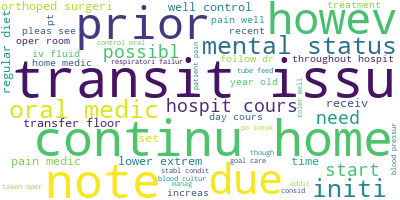

In [14]:
from wordcloud import WordCloud
My_WordCloud = WordCloud(background_color="white", max_words=50)

My_Long_String_Topic0 =','.join(list(df_Topic0["Processed_Clinician_Note"].values))

My_WordCloud.generate(My_Long_String_Topic0)
My_WordCloud.to_image()

/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation 

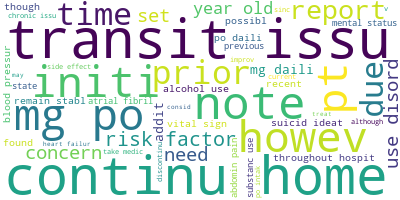

In [15]:
My_Long_String_Topic1 =','.join(list(df_Topic1["Processed_Clinician_Note"].values))

My_WordCloud.generate(My_Long_String_Topic1)
My_WordCloud.to_image()

/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None 

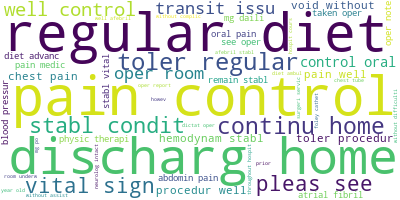

In [16]:
My_Long_String_Topic2 =','.join(list(df_Topic2["Processed_Clinician_Note"].values))

My_WordCloud.generate(My_Long_String_Topic2)
My_WordCloud.to_image()

##### Topic 2 profile: LDA

In [17]:
number_of_topics = 3
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(number_of_topics))

gensimvis.prepare(My_LDA, My_Corpus, My_id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.005008 -0.000008       1        1  38.022123
1      0.002512 -0.003744       2        1  32.057316
0      0.002496  0.003751       3        1  29.920562, topic_info=         Term          Freq         Total Category  logprob  loglift
38         pt  21426.000000  21426.000000  Default  30.0000  30.0000
31    outpati  41395.000000  41395.000000  Default  29.0000  29.0000
190     cours  31667.000000  31667.000000  Default  28.0000  28.0000
719      week  25803.000000  25803.000000  Default  27.0000  27.0000
206    follow  52911.000000  52911.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
158     stabl  11301.498006  46082.889920   Topic3  -5.5600  -0.1989
335     daili   9896.190146  37210.798993   Topic3  -5.6928  -0.1178
25       issu  10055.345481  38818.154057   Topic3  -5.6768  -0.1442
194  discharg   9400.292800  34822.611157   Topic3  -5.7442  -0.1029
384        mg   9469.807376  37228.125972   Topic3  -5.7368  -0.1623

[330 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
22122      2  0.808378  1101506090s
16937      1  0.820874         153k
23708      1  0.167198         1the
23708      2  0.668793         1the
23708      3  0.167198         1the
...      ...       ...          ...
179        2  0.388195         year
179        3  0.233321         year
41432      1  0.174379       zithro
41432      2  0.697517       zithro
41432      3  0.174379       zithro

[689 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

##### Topic 3 profile: Word Frequency Bar Plot

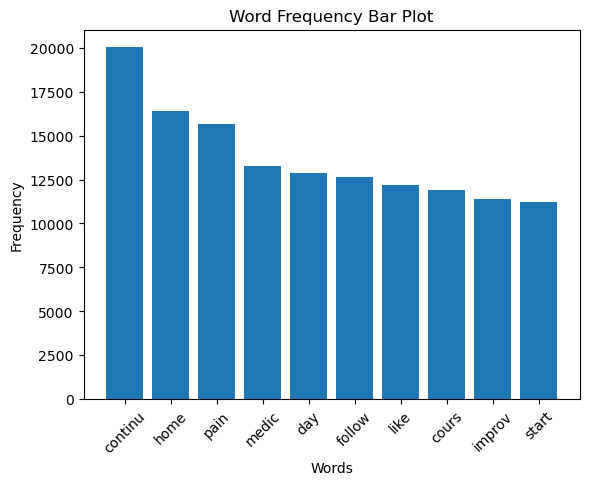

In [18]:
# Choosen topic
My_word_frequent_bar_plot_Topic0 =','.join(list(df_Topic0["Processed_Clinician_Note"].values))

# Tokenize the text into words
words = My_word_frequent_bar_plot_Topic0.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the most common words and their frequencies
top_words = word_counts.most_common(10)
top_words, frequencies = zip(*top_words)

# Plot the word frequency bar plot
plt.bar(top_words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Bar Plot')
plt.xticks(rotation=45)
plt.show()

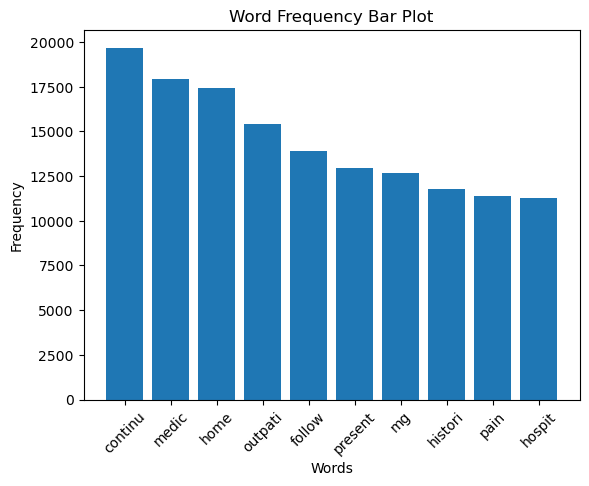

In [19]:
My_word_frequent_bar_plot_Topic1 =','.join(list(df_Topic1["Processed_Clinician_Note"].values))

words = My_word_frequent_bar_plot_Topic1.split()

word_counts = Counter(words)

top_words = word_counts.most_common(10)
top_words, frequencies = zip(*top_words)

plt.bar(top_words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Bar Plot')
plt.xticks(rotation=45)
plt.show()

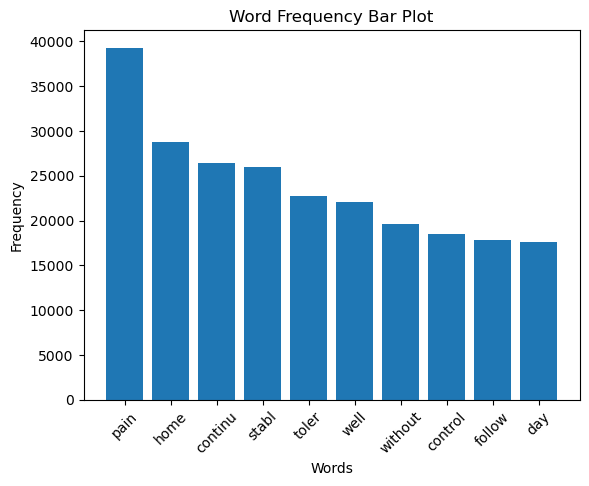

In [20]:
My_word_frequent_bar_plot_Topic2 =','.join(list(df_Topic2["Processed_Clinician_Note"].values))

words = My_word_frequent_bar_plot_Topic2.split()

word_counts = Counter(words)

top_words = word_counts.most_common(10)
top_words, frequencies = zip(*top_words)

plt.bar(top_words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Bar Plot')
plt.xticks(rotation=45)
plt.show()

# Model building & evaluation

Cross-validation on datasets preprocessed to contain numerical and nominal features was used to evaluate the performance of the created SVM models. The accuracy scores show a range between 0.5566 and 0.5594, while the mean accuracy is calculated to be 0.5584. Although the precision percentage is a bit higher than 50%, it is imperative to evaluate it within the particular context of the given application. The precision scores display a range between 0.3184 and 0.4634, with a mean precision of 0.3715. This suggests that the model's ability to accurately identify positive examples is moderate. The recall scores exhibited a range of 0.2915 to 0.2958, with a mean recall of 0.2942, signifying a degree of efficacy in the identification of affirmative instances. The F1-scores showed a range of values between 0.2482 and 0.2545, while the mean F1-score was calculated to be 0.2525. This indicates a well-balanced evaluation of both precision and recall. Overall, the Support Vector Machine (SVM) model that was developed demonstrates moderate performance.

##### Model building

In [21]:
df_for_practice = df_enriched.drop(columns = [ "Patient_ID","Clinician_Note","Processed_Clinician_Note", "Tokens"])

nominal_columns=df_for_practice.select_dtypes(include= ['object']) 
numerical_columns=df_for_practice.select_dtypes(exclude= ['object']) 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

nominal_converted = nominal_columns.apply(le.fit_transform)

df_for_practice2 = pd.concat([numerical_columns, nominal_converted], axis=1)

##### Model evaluation

In [22]:
# Create the SVM model
model = SVC()

# Perform cross-validation
y = df_for_practice2["Discharge_Decision"]
X = df_for_practice2[['AHRQ Elixhauser score', 'Van Walraven Elixhauser score', 'Sentiment','SVD1', 'SVD2', 'SVD3', "Topic0", "Topic1", "Topic2", "Topic_No"]]

scores = cross_val_score(model, X, y, cv=6, scoring='accuracy')

# Compute the mean accuracy
mean_accuracy = scores.mean()

# Perform cross-validation for precision
precision_scores = cross_val_score(model, X, y, cv=6, scoring='precision_macro')

# Compute the mean precision
mean_precision = precision_scores.mean()

# Perform cross-validation for recall
recall_scores = cross_val_score(model, X, y, cv=6, scoring='recall_macro')

# Compute the mean recall
mean_recall = recall_scores.mean()

# Perform cross-validation for F1 score
f1_scores = cross_val_score(model, X, y, cv=6, scoring='f1_macro')

# Compute the mean F1 score
mean_f1 = f1_scores.mean()

print("Accuracy scores:", scores)
print("Mean accuracy:", mean_accuracy)
print("Precision scores:", precision_scores)
print("Mean precision:", mean_precision)
print("Recall scores:", recall_scores)
print("Mean recall:", mean_recall)
print("F1 scores:", f1_scores)
print("Mean F1 score:", mean_f1)

/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages

Accuracy scores: [0.55903071 0.55663567 0.55832629 0.55784134 0.55925039 0.55939129]
Mean accuracy: 0.5584126158312435
Precision scores: [0.34105645 0.36895422 0.4634038  0.31837526 0.36170605 0.37567913]
Mean precision: 0.3715291507275314
Recall scores: [0.29482886 0.2915481  0.29581839 0.29257725 0.29488303 0.29541888]
Mean recall: 0.29417908301912915
F1 scores: [0.25420603 0.24820542 0.25407278 0.25098179 0.25282661 0.25450447]
Mean F1 score: 0.2524661842572708
